#Ejercicio 18: Generador de tono variable con dsPIC y DAC R2R
Configurar un dsPIC para leer un voltaje analógico a través de un ADC, y utilizar esa lectura para generar una señal de frecuencia variable. La señal será producida en 10 pines digitales conectados a un DAC R2R, que convertirá la señal digital en una salida analógica.

##Descripción
1- Configuración del ADC:
- Configura un canal del ADC para leer un voltaje aplicado a un pin analógico del dsPIC. El rango de voltaje es de 1 a 3V.
- Configura el ADC para que funcione en modo de conversión continua y para que convierta el voltaje con una resolución de 12 bits.

2- Configuración de los pines digitales:
- Configura 10 pines digitales del dsPIC como salidas. Estos pines se conectarán a un DAC R2R construido con resistencias.
- El DAC R2R debe estar diseñado para convertir la señal digital de 10 bits en una señal analógica.

3- Generación de la señal de frecuencia variable:
- Usa la lectura del ADC para ajustar la frecuencia de un tono. La señal debe ser generada en función de la lectura del ADC y salida a través de los 10 pines digitales configurados.
- La frecuencia del tono debe variar en función del voltaje medido por el ADC, con un rango de frecuencia entre 50 Hz y 500 Hz.

4- Salida a DAC R2R:
- Conecta los 10 pines digitales al DAC R2R, que estará armado con resistencias para convertir la señal digital en una señal analógica.
- La salida analógica del DAC R2R debe ser observable con un osciloscopio.

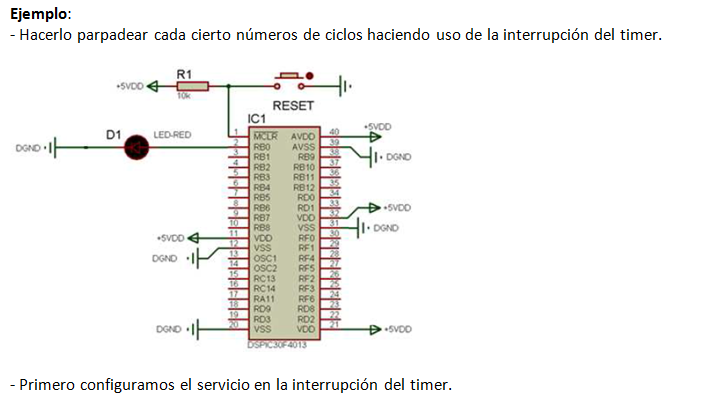

In [ ]:
# Código en MikroC para dsPIC30F4013
# Este programa configura el ADC para leer un voltaje entre 1V y 3V
# y genera una señal de frecuencia variable entre 50 Hz y 500 Hz
# usando 10 pines digitales conectados a un DAC R2R

unsigned int adc_value;
unsigned int frecuencia;
unsigned int periodo;

// Inicialización del ADC
void Init_ADC() {
    ADCON1 = 0x00E0; // Modo automático, formato entero
    ADCON2 = 0x0000; // Usa Vref+ y Vref- como referencias
    ADCON3 = 0x1F02; // Tiempo de muestreo y conversión
    ADCHS = 0x0000;  // Selecciona AN0 como canal de entrada
    ADCON1bits.ADON = 1; // Enciende el ADC
}

// Inicialización de los pines digitales RB0-RB9 como salidas
void Init_DAC_Pins() {
    TRISB = 0xFC00; // RB0-RB9 como salidas, RB10-RB15 como entradas
    LATB = 0;       // Inicializa salida en bajo
}

// Calcula la frecuencia en función del valor del ADC
void Calcular_Frecuencia() {
    adc_value = ADCBUF0; // Leer valor del ADC
    frecuencia = 50 + ((adc_value * 450) / 4095); // Mapea a 50-500 Hz
    periodo = (1000000 / frecuencia); // Periodo en microsegundos
}

// Genera una onda cuadrada de 10 bits y la envía al DAC R2R
void Generar_Tono() {
    unsigned int valor = 0;
    Calcular_Frecuencia();
    LATB = valor & 0x03FF; // Enviar 10 bits a RB0-RB9
    Delay_us(periodo / 2);
    LATB = (~valor) & 0x03FF; // Invertir señal
    Delay_us(periodo / 2);
}

// Programa principal
void main() {
    Init_ADC();
    Init_DAC_Pins();
    while (1) {
        Generar_Tono();
    }
}

#🧰 2. Diseño del DAC R2R (10 bits)
En el diagrama generado del DAC R2R de 10 bits. Cada bit se conecta a una resistencia en escalera que forma el DAC:
!DAC R2R de 10 bits
Valores típicos de resistencias:

R = 10 kΩ
2R = 20 kΩ

Cada pin digital del dsPIC se conecta a una rama del DAC. El último nodo se conecta a un amplificador operacional en configuración seguidor (buffer) para observar la señal en el osciloscopio.

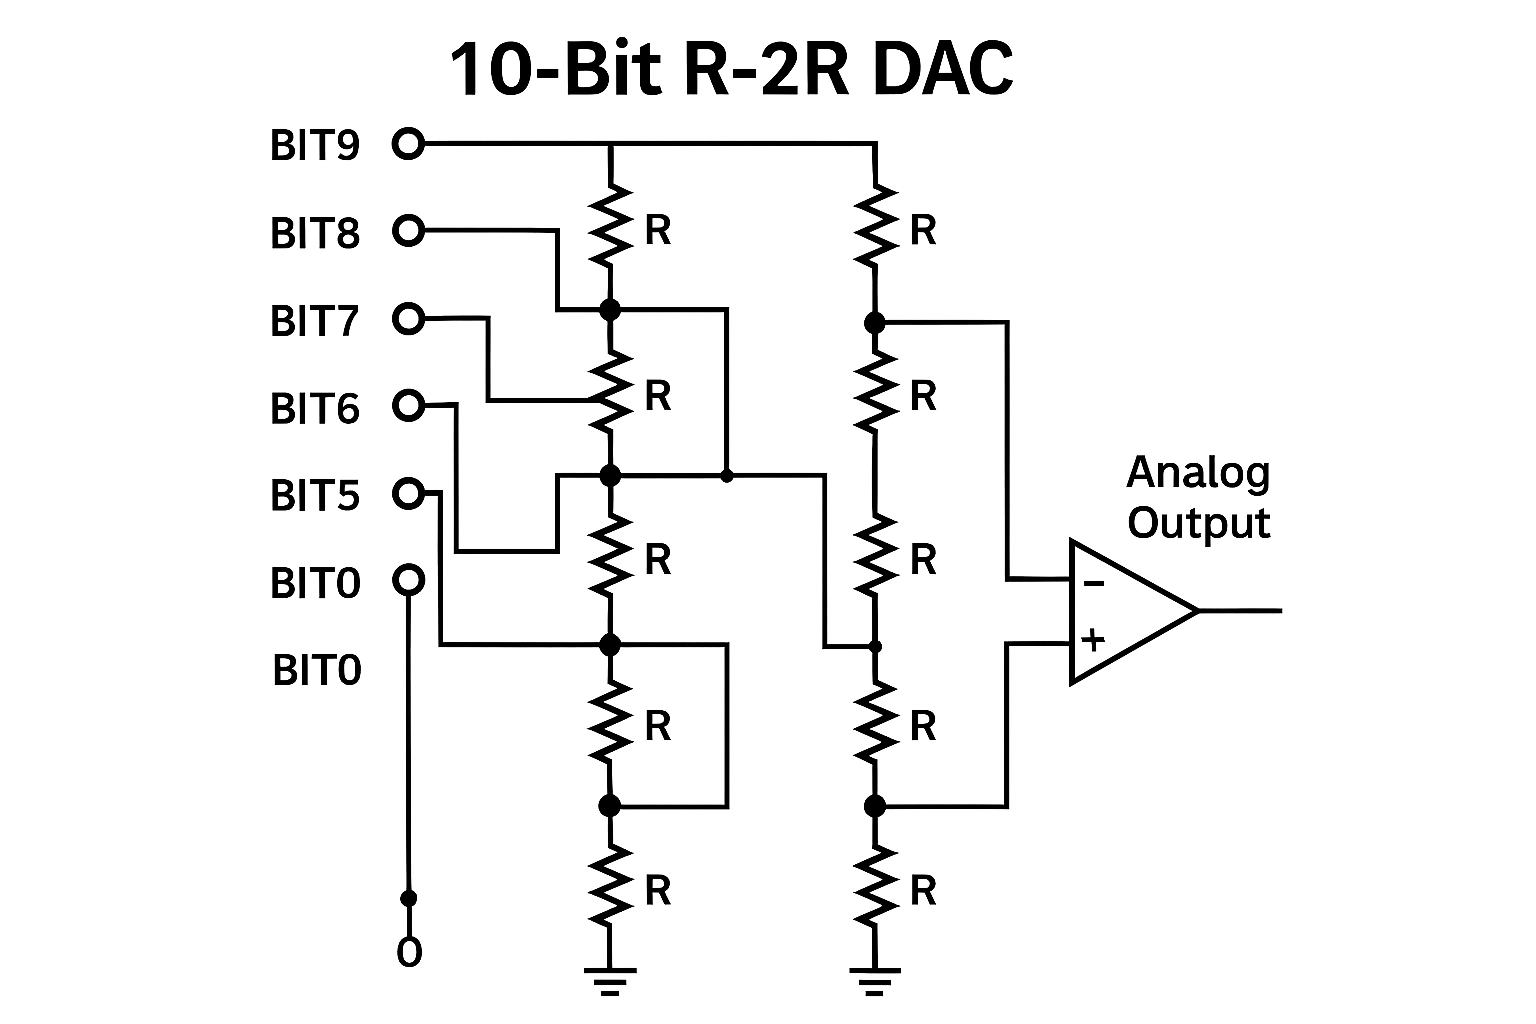